In [2]:
from bs4 import BeautifulSoup

In [3]:
import requests

In [4]:
res = requests.get('https://www.naver.com/')

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
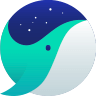
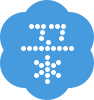

In [5]:
res.text

In [6]:
soup = BeautifulSoup(res.text, 'html.parser')

In [7]:
path = '#NM_FAVORITE > div.group_nav > ul.list_nav.NM_FAVORITE_LIST >li' 

In [8]:
soup.select(path)

[<li class="nav_item"><a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.land" href="https://land.naver.com/">부동산</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.map" href="https://map.naver.com/">지도</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.vibe" href="https://vibe.naver.com/">VIBE</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.book" href="https://book.naver.com/">책</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.webtoon" href="https://comic.naver.com/">웹툰</a></li>]

In [9]:
lis = soup.select(path)

In [10]:
for li in lis:
    print(li.text, li.select('a'))

사전 [<a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>]
뉴스 [<a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>]
증권 [<a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>]
부동산 [<a class="nav" data-clk="svc.land" href="https://land.naver.com/">부동산</a>]
지도 [<a class="nav" data-clk="svc.map" href="https://map.naver.com/">지도</a>]
VIBE [<a class="nav" data-clk="svc.vibe" href="https://vibe.naver.com/">VIBE</a>]
책 [<a class="nav" data-clk="svc.book" href="https://book.naver.com/">책</a>]
웹툰 [<a class="nav" data-clk="svc.webtoon" href="https://comic.naver.com/">웹툰</a>]


In [11]:
for li in lis:
    print(li.text, li.select('a')[0]['href'])

사전 https://dict.naver.com/
뉴스 https://news.naver.com/
증권 https://finance.naver.com/
부동산 https://land.naver.com/
지도 https://map.naver.com/
VIBE https://vibe.naver.com/
책 https://book.naver.com/
웹툰 https://comic.naver.com/


In [12]:
# 다음 뉴스 타이틀 크롤링..
url = 'https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0'
res = requests.get(url)
res.text

soup = BeautifulSoup(res.text, 'html.parser')
path = '#newsColl > div.cont_divider > ul > li > div.wrap_cont > a'
tags = soup.select(path)

In [13]:
soup.select(path)

[]

In [14]:
for t in tags:
    print(t.text)
    print(t['href'])
    print('--------')

In [28]:
html = """
<html>
<head>
    <title>The Dormouse's story</title>
</head>
<body>
    <h1>this is h1 area</h1>
    <h2>this is h2 area</h2>
    <p class="title">
        <b>The Dormouse's story</b>
    </p>
    <p class="story">
        Once upon a time there were three little sisters
        <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>
        <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a>
        <a data-io="link3" href="http://example.com/tillie" class="brother" id="link3">Tillie</a>
        <b> 
            test
            <a href="http://example.com/test" class="brother" id="link4">TEST</a>
        </b>

    </p>
    <p class="story">story...</p>
</body>
</html>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

print(soup.select('title')[0].text)
print(soup.select('a#link1')[0].text)
print(soup.select('a')[0]['href'])
print(soup.select('b')[1].text.strip().split()[0])
print(soup.select('p.story')[1].text)


The Dormouse's story
Elsie
http://example.com/elsie
test
story...
